In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

from scipy import stats
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

import acquire
from acquire import get_connection
from acquire import acquire_zillow

import wrangle
from wrangle import clean_zillow
from wrangle import split_zillow

import scale
from scale import visualize_scaled_date 

In [2]:
df = acquire_zillow()

In [3]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
0,1125.0,3.0,2.0,NaN,289445.0
1,1316.0,3.0,2.0,5672.0,205123.0
2,1458.0,3.0,2.0,8284.0,136104.0
3,1766.0,3.0,2.0,25082.0,810694.0
4,1421.0,2.0,1.0,6707.0,35606.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38582 entries, 0 to 38581
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  38474 non-null  float64
 1   bedroomcnt                    38582 non-null  float64
 2   bathroomcnt                   38582 non-null  float64
 3   lotsizesquarefeet             34218 non-null  float64
 4   taxvaluedollarcnt             38581 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [5]:
df.shape

(38582, 5)

In [6]:
df = clean_zillow(df)

In [7]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
0,1125.0,3.0,2.0,0.0,289445.0
1,1316.0,3.0,2.0,5672.0,205123.0
2,1458.0,3.0,2.0,8284.0,136104.0
3,1766.0,3.0,2.0,25082.0,810694.0
4,1421.0,2.0,1.0,6707.0,35606.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38582 entries, 0 to 38581
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  38582 non-null  float64
 1   bedroomcnt                    38582 non-null  float64
 2   bathroomcnt                   38582 non-null  float64
 3   lotsizesquarefeet             38582 non-null  float64
 4   taxvaluedollarcnt             38582 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


### Aquired Data
    - opbained data from the zillow database through a SQl Query
### SQL Query =  
    '''
    SELECT calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt, lotsizesquarefeet, taxvaluedollarcnt
    from  properties_2017
    join predictions_2017 using(parcelid)
    where transactiondate between "2017-05-01" and "2017-08-31"
    and propertylandusetypeid between 260 and 266
    or propertylandusetypeid between 273 and 279
    and not propertylandusetypeid = 274
    and unitcnt = 1;
                        
    '''
    
### Wrangle
    def clean_zillow(df):
    '''
    Takes in a df of zillow_data and cleans the data appropriatly by dropping null values in each column if < 80 percent,
    fills any extra nan with 0,
    return: df, a cleaned pandas data frame.
    '''
    after we have cleaned the data we are left with 38582 records
    

# Split Data


### Split Data
    -  split_zillow(df)
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes:
    train (df), validate,  X_test, 
    '''
    
 ### Address Outliers
     - the data is heavily scewed due to outliers 
     - we will need to address this so that the data is more normaly distributed. 

In [9]:
train, validate, test = split_zillow(df)

In [10]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
34440,993.0,2.0,1.0,27420.0,332874.0
9092,1326.0,3.0,2.0,4400.0,444382.0
6369,1414.0,3.0,2.5,0.0,225407.0
30976,1744.0,4.0,3.0,4558.0,166437.0
8815,2966.0,4.0,3.0,8050.0,638507.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 34440 to 16893
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  21605 non-null  float64
 1   bedroomcnt                    21605 non-null  float64
 2   bathroomcnt                   21605 non-null  float64
 3   lotsizesquarefeet             21605 non-null  float64
 4   taxvaluedollarcnt             21605 non-null  float64
dtypes: float64(5)
memory usage: 1012.7 KB


In [12]:
train.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
count,21605.000000,21605.000000,21605.000000,2.160500e+04,2.160500e+04
mean,1754.186762,3.006897,2.270724,2.558179e+04,4.952424e+05
std,940.546070,1.030456,0.947791,9.349446e+04,6.553387e+05
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+03
25%,1170.000000,2.000000,2.000000,5.032000e+03,2.081870e+05
50%,1521.000000,3.000000,2.000000,6.868000e+03,3.640780e+05
75%,2070.000000,4.000000,3.000000,1.064000e+04,5.751430e+05
max,17245.000000,12.000000,11.000000,3.589145e+06,2.385837e+07


<AxesSubplot:>

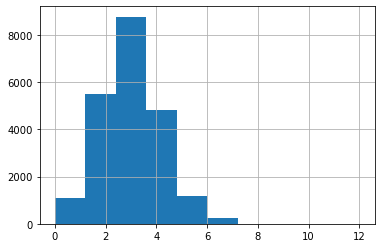

In [13]:
train.bedroomcnt.hist()

<AxesSubplot:>

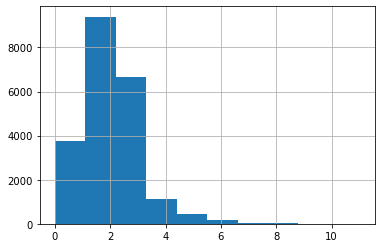

In [14]:
train.bathroomcnt.hist()

<AxesSubplot:>

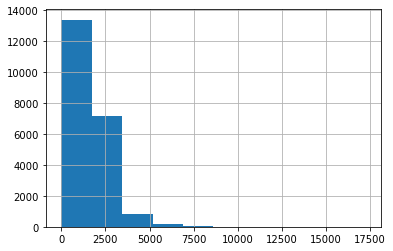

In [15]:
train.calculatedfinishedsquarefeet.hist()

<AxesSubplot:>

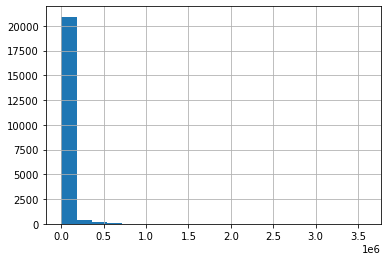

In [16]:
train.lotsizesquarefeet.hist(bins = 20)

In [17]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
34440,993.0,2.0,1.0,27420.0,332874.0
9092,1326.0,3.0,2.0,4400.0,444382.0
6369,1414.0,3.0,2.5,0.0,225407.0
30976,1744.0,4.0,3.0,4558.0,166437.0
8815,2966.0,4.0,3.0,8050.0,638507.0


In [18]:
train.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
count,21605.000000,21605.000000,21605.000000,2.160500e+04,2.160500e+04
mean,1754.186762,3.006897,2.270724,2.558179e+04,4.952424e+05
std,940.546070,1.030456,0.947791,9.349446e+04,6.553387e+05
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+03
25%,1170.000000,2.000000,2.000000,5.032000e+03,2.081870e+05
50%,1521.000000,3.000000,2.000000,6.868000e+03,3.640780e+05
75%,2070.000000,4.000000,3.000000,1.064000e+04,5.751430e+05
max,17245.000000,12.000000,11.000000,3.589145e+06,2.385837e+07


In [19]:
train.shape

(21605, 5)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 34440 to 16893
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  21605 non-null  float64
 1   bedroomcnt                    21605 non-null  float64
 2   bathroomcnt                   21605 non-null  float64
 3   lotsizesquarefeet             21605 non-null  float64
 4   taxvaluedollarcnt             21605 non-null  float64
dtypes: float64(5)
memory usage: 1012.7 KB


# Remove Outliers

### taxvaluedollarcnt

In [21]:
# Let's use IQR for the entire dataset
q1 = df.taxvaluedollarcnt.quantile(.25)
q3 = df.taxvaluedollarcnt.quantile(.75)
q1, q3

(209205.5, 577914.0)

In [22]:
iqr = q3 - q1
iqr

368708.5

In [23]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [24]:
lower_bound

-343857.25

In [25]:
upper_bound

1130976.75

In [26]:
# Let's filter out the low outliers
df = df[df.taxvaluedollarcnt > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.taxvaluedollarcnt < upper_bound]
df.shape

(36003, 5)

### calculatedfinishedsquarefeet

In [27]:
# Let's use IQR for the entire dataset
q1 = df.calculatedfinishedsquarefeet.quantile(.25)
q3 = df.calculatedfinishedsquarefeet.quantile(.75)
q1, q3

(1149.0, 1953.0)

In [28]:
iqr = q3 - q1
iqr

804.0

In [29]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [30]:
lower_bound

-57.0

In [31]:
upper_bound

3159.0

In [32]:
# Let's filter out the low outliers
df = df[df.calculatedfinishedsquarefeet > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.calculatedfinishedsquarefeet < upper_bound]
df.shape

(34620, 5)

### lotsizesquarefeet

In [33]:
q1 = df.lotsizesquarefeet.quantile(.25)
q3 = df.lotsizesquarefeet.quantile(.75)
q1, q3

(4998.75, 9801.25)

In [34]:
iqr = q3 - q1
iqr

4802.5

In [35]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [36]:
lower_bound

-2205.0

In [37]:
upper_bound

17005.0

In [38]:
# Let's filter out the low outliers
df = df[df.lotsizesquarefeet > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.lotsizesquarefeet < upper_bound]
df.shape

(29040, 5)

### bathroomcnt

In [39]:
q1 = df.bathroomcnt.quantile(.25)
q3 = df.bathroomcnt.quantile(.75)
q1, q3

(2.0, 2.5)

In [40]:
iqr = q3 - q1
iqr

0.5

In [41]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [42]:
lower_bound

1.25

In [43]:
upper_bound

3.25

In [44]:
# Let's filter out the low outliers
df = df[df.bathroomcnt > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.bathroomcnt < upper_bound]
df.shape

(22634, 5)

(array([1.000e+00, 5.000e+00, 4.560e+02, 4.266e+03, 6.224e+03, 4.919e+03,
        3.048e+03, 1.946e+03, 1.168e+03, 6.010e+02]),
 array([   0. ,  315.6,  631.2,  946.8, 1262.4, 1578. , 1893.6, 2209.2,
        2524.8, 2840.4, 3156. ]),
 <BarContainer object of 10 artists>)

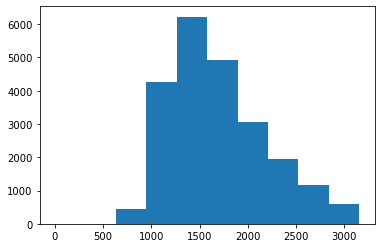

In [45]:
plt.hist(x="calculatedfinishedsquarefeet", data=df)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

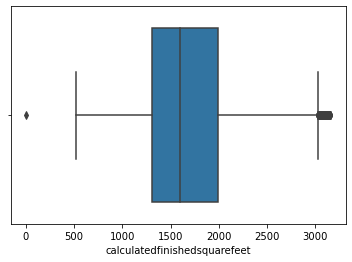

In [46]:
sns.boxplot(x="calculatedfinishedsquarefeet", data=df)

(array([3840., 1134., 2125., 6037., 5315., 1880., 1025.,  609.,  415.,
         254.]),
 array([    0.,  1700.,  3400.,  5100.,  6800.,  8500., 10200., 11900.,
        13600., 15300., 17000.]),
 <BarContainer object of 10 artists>)

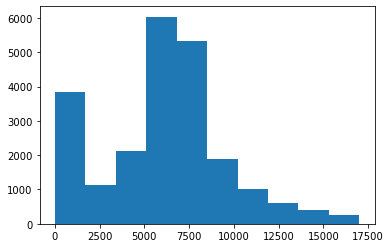

In [47]:
plt.hist(x="lotsizesquarefeet", data=df)

<AxesSubplot:xlabel='lotsizesquarefeet'>

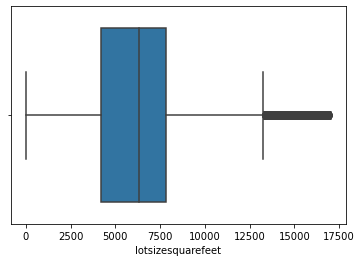

In [48]:
sns.boxplot(x="lotsizesquarefeet", data=df)

(array([6.0000e+00, 1.2700e+02, 4.2580e+03, 1.1031e+04, 6.2740e+03,
        8.4300e+02, 8.5000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

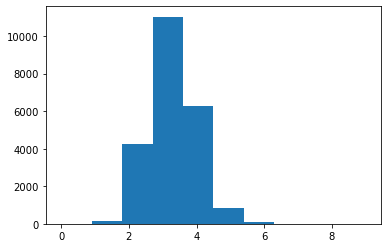

In [49]:
plt.hist(x="bedroomcnt", data=df)

<AxesSubplot:xlabel='bedroomcnt'>

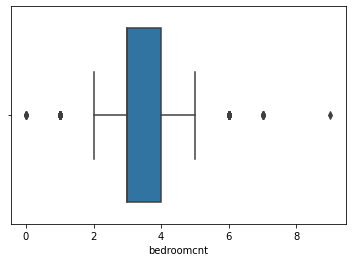

In [50]:
sns.boxplot(x="bedroomcnt", data=df)

<AxesSubplot:xlabel='bathroomcnt'>

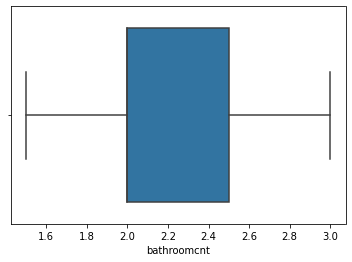

In [51]:
sns.boxplot(x="bathroomcnt", data=df)

# Split Data

In [52]:
train, validate, test = split_zillow(df)

In [53]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
27625,2440.0,4.0,3.0,7549.0,701000.0
20567,1586.0,4.0,3.0,9630.0,710675.0
19775,1375.0,3.0,2.0,0.0,124456.0
5344,2855.0,4.0,3.0,6314.0,694978.0
32713,1304.0,2.0,2.0,6599.0,78853.0


# Explore


    - def explore_univariate(X_train, quant_vars):
        for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(X_train, col)
        plt.show(p)
        print(descriptive_stats)
        
     - The data is now less skewed due to outliers
     
     - Number of Outliers removed:
     
         - calculatedfinishedsquarefeet
             - 2,471
         - lotsizesquarefeet
             - 5,571
         - bathroomcnt
             - 6406



In [54]:
from explore import explore_univariate

In [55]:
quant_vars = ['taxvaluedollarcnt', 'calculatedfinishedsquarefeet','bedroomcnt', 'bathroomcnt', 'lotsizesquarefeet']

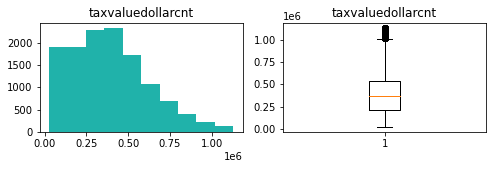

count    1.267400e+04
mean     3.909451e+05
std      2.295525e+05
min      2.542200e+04
25%      2.128438e+05
50%      3.670280e+05
75%      5.322745e+05
max      1.129312e+06
Name: taxvaluedollarcnt, dtype: float64


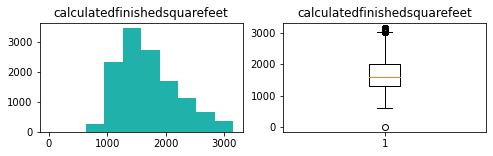

count    12674.000000
mean      1694.472463
std        498.420767
min          0.000000
25%       1312.000000
50%       1600.000000
75%       1998.750000
max       3156.000000
Name: calculatedfinishedsquarefeet, dtype: float64


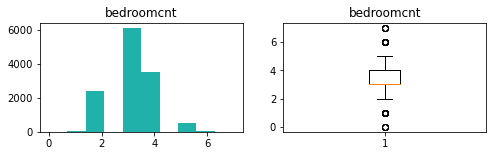

count    12674.000000
mean         3.168771
std          0.812978
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: bedroomcnt, dtype: float64


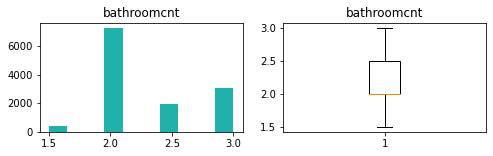

count    12674.000000
mean         2.302746
std          0.444183
min          1.500000
25%          2.000000
50%          2.000000
75%          2.500000
max          3.000000
Name: bathroomcnt, dtype: float64


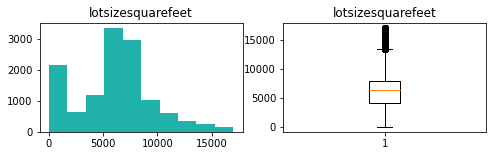

count    12674.000000
mean      6009.665694
std       3645.997273
min          0.000000
25%       4104.500000
50%       6323.500000
75%       7812.000000
max      17000.000000
Name: lotsizesquarefeet, dtype: float64


In [56]:
explore_univariate(train, quant_vars)

# Scale Data

In [57]:
from scale import Min_Max_Scaler_2

In [58]:
X_train = train.drop(columns = ['taxvaluedollarcnt'])
X_validate = validate.drop(columns = ['taxvaluedollarcnt'])
X_test = test.drop(columns = ['taxvaluedollarcnt'])

y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)
y_test = pd.DataFrame(test.taxvaluedollarcnt)

In [59]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler_2(X_train, X_validate, X_test)

In [60]:
X_train_scaled.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet
27625,0.773131,0.571429,1.000000,0.444059
20567,0.502535,0.571429,1.000000,0.566471
19775,0.435678,0.428571,0.333333,0.000000
5344,0.904626,0.571429,1.000000,0.371412
32713,0.413181,0.285714,0.333333,0.388176


In [61]:
X_train_scaled.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet
count,12674.000000,12674.000000,12674.000000,12674.000000
mean,0.536905,0.452682,0.535164,0.353510
std,0.157928,0.116140,0.296122,0.214470
min,0.000000,0.000000,0.000000,0.000000
25%,0.415716,0.428571,0.333333,0.241441
50%,0.506971,0.428571,0.333333,0.371971
75%,0.633317,0.571429,0.666667,0.459529
max,1.000000,1.000000,1.000000,1.000000


In [62]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [63]:
X_train = pd.concat([X_train_scaled, y_train,], axis = 1)
X_validate = pd.concat([X_validate_scaled, y_validate,], axis = 1)
X_test = pd.concat([X_test_scaled, y_test,], axis = 1)

In [64]:
X_train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
27625,0.773131,0.571429,1.000000,0.444059,701000.0
20567,0.502535,0.571429,1.000000,0.566471,710675.0
19775,0.435678,0.428571,0.333333,0.000000,124456.0
5344,0.904626,0.571429,1.000000,0.371412,694978.0
32713,0.413181,0.285714,0.333333,0.388176,78853.0


In [65]:
from statsmodels.formula.api import ols

model = ols('taxvaluedollarcnt ~ calculatedfinishedsquarefeet + bedroomcnt + bathroomcnt + lotsizesquarefeet', data=X_train).fit()  
predictions = model.predict(X_train)

In [66]:
X_train['yhat'] = predictions
X_train['baseline'] = X_train.taxvaluedollarcnt.mean()

In [67]:
X_train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yhat,baseline
27625,0.773131,0.571429,1.000000,0.444059,701000.0,524333.510629,390945.136737
20567,0.502535,0.571429,1.000000,0.566471,710675.0,346547.850408,390945.136737
19775,0.435678,0.428571,0.333333,0.000000,124456.0,356337.128699,390945.136737
5344,0.904626,0.571429,1.000000,0.371412,694978.0,612037.927874,390945.136737
32713,0.413181,0.285714,0.333333,0.388176,78853.0,349629.600822,390945.136737


In [68]:
cor = X_train.drop(columns = ['yhat','baseline'])

<AxesSubplot:>

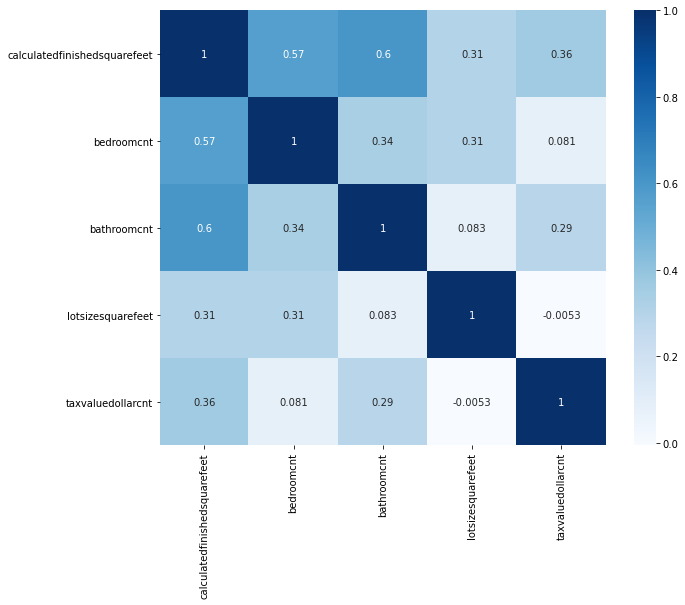

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(cor.corr(), cmap='Blues', annot=True)

# Take aways 
    - the strongest corr is calcualted square feet on the target of taxvaluesdollarcnt. 
        - corr = .36
    - The secound strongest corr is bathroomcnt.
        - corr = .29
    - Next we will want to do some stats tests to confirm
    - There seems do be a weak negative corr for lotsize

# Stat Tests

Reject Ho 0.36104695077302335 0.0


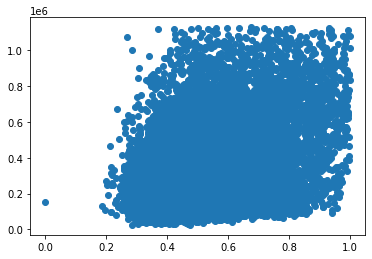

In [70]:
Ho = "No correlation between square footage and home value."
Ha = "There IS a correlation between square footage and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.calculatedfinishedsquarefeet
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Reject Ho 0.08131869803834296 4.772012984246479e-20


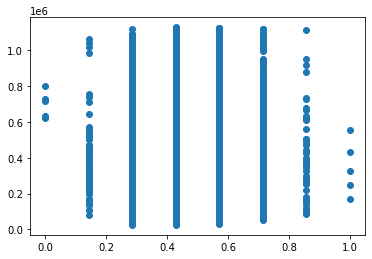

In [71]:
Ho = "No correlation between bedroomscnt and home value."
Ha = "There IS a correlation between bedroomscnt and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.bedroomcnt
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Reject Ho 0.2906875806554515 2.858935991469364e-245


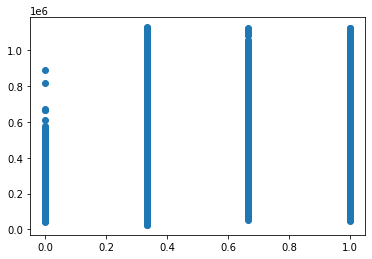

In [72]:
Ho = "No correlation between bathroomcnt and home value."
Ha = "There IS a correlation between bathroomcnt and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.bathroomcnt
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Fail To Reject Ho -0.005315897339067781 0.5495711514225857


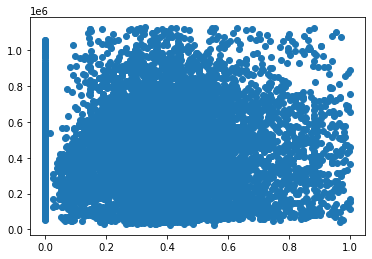

In [73]:
Ho = "No correlation between lotsizesquarefeet and home value."
Ha = "There IS a correlation between lotsizesquarefeet and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.lotsizesquarefeet
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

### Take Aways 
    - there is some corr with features: square feet, bathroomcnt, bedroomcnt.
    - there seems to be no correlation with lot size with the target.
        - Id like to see which lot sizes are in each pips code. and then run the pips aginst the target to see how pips relate to the target.


# Evaluate

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

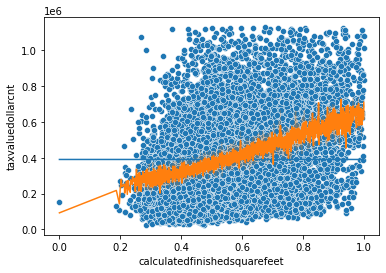

In [74]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data = X_train)
sns.lineplot(x = 'calculatedfinishedsquarefeet', y = 'baseline', data = X_train)
sns.lineplot(x = 'calculatedfinishedsquarefeet', y = 'yhat', data = X_train)

In [75]:
X_train['residual'] = X_train.taxvaluedollarcnt - X_train.yhat
X_train['baseline_residual'] = X_train.taxvaluedollarcnt - X_train.baseline

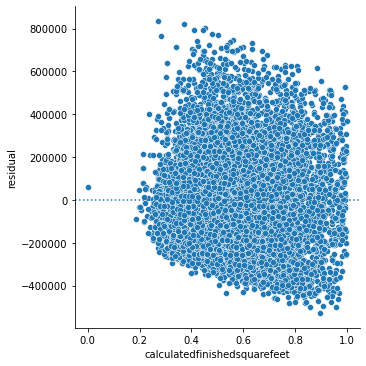

In [76]:
sns.relplot(x = 'calculatedfinishedsquarefeet', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

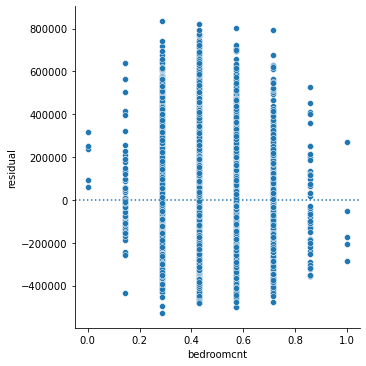

In [77]:
sns.relplot(x = 'bedroomcnt', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

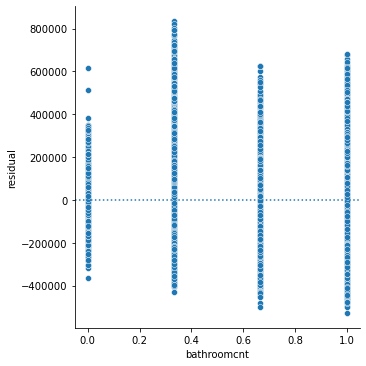

In [78]:
sns.relplot(x = 'bathroomcnt', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

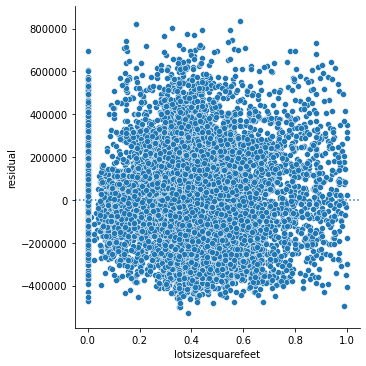

In [79]:
sns.relplot(x = 'lotsizesquarefeet', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

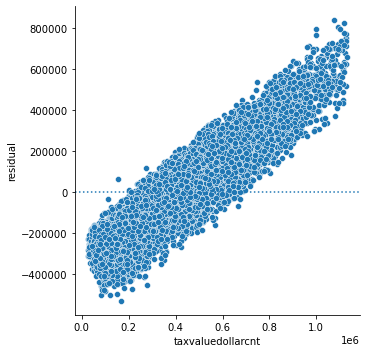

In [80]:
sns.relplot(x = 'taxvaluedollarcnt', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

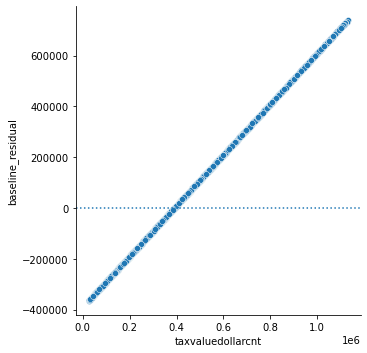

In [81]:
sns.relplot(x = 'taxvaluedollarcnt', y = 'baseline_residual', data = X_train)
plt.axhline(0, ls = ':')

In [82]:
SSE = (X_train.residual**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the OLS model is 555446260782648.7


In [83]:
SSE_baseline = (X_train.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

 The SSE of the baseline model is 667795736102400.0


In [84]:
MSE = SSE/len(X_train)
print(f' The MSE of the OLS model is {round(MSE,1)}')

 The MSE of the OLS model is 43825647844.6


In [85]:
MSE_baseline = SSE_baseline/len(X_train)
print(f' The MSE of the baseline model is {round(MSE_baseline,1)}')

 The MSE of the baseline model is 52690211149.0


In [86]:
RMSE = mean_squared_error(X_train.taxvaluedollarcnt, X_train.yhat, squared = False)
print(f' The RMSE of the OLS model is {round(RMSE,1)}')

 The RMSE of the OLS model is 209345.8


In [87]:
RMSE_baseline = mean_squared_error(X_train.taxvaluedollarcnt, X_train.baseline, squared = False)
print(f' The RMSE of the baseline model is {round(RMSE_baseline,1)}')

 The RMSE of the baseline model is 229543.5


In [88]:
import numpy as np
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,5.554463e+14
1,MSE,4.382565e+10
2,RMSE,2.093458e+05


In [89]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval

,metric,model_error,baseline_error
0,SSE,5.554463e+14,6.677957e+14
1,MSE,4.382565e+10,5.269021e+10
2,RMSE,2.093458e+05,2.295435e+05


In [90]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

In [91]:
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,5.554463e+14,6.677957e+14,True
1,MSE,4.382565e+10,5.269021e+10,True
2,RMSE,2.093458e+05,2.295435e+05,True


In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     640.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:13:30   Log-Likelihood:            -1.7326e+05
No. Observations:               12674   AIC:                         3.465e+05
Df Residuals:                   12669   BIC:                         3.466e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.011e+05   7983.940     25.187      0.000    1.85e+05    2.17e+05
calculatedfinishedsquarefeet   6.12e+05   1.72e+04     35.503      0.000    5.78e+05    6.46e+05
bedroomcnt                   -3.198e+05   1.97e+04    -16.229      0.000   -3.58e+05   -2.81e+05
bathroomcnt                   7.704e+04   7951.079      9.689      0.000    6.15e+04    9.26e+04
lotsizesquarefeet            -9.952e+04   9334.658    -10.661      0.000   -1.18e+05   -8.12e+04
==============================================================================
Omnibus:                      414.400   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.285
Skew:                           0.461   Prob(JB):                     1.37e-99
Kurtosis:                       3.108   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Take Aways
    - RMSE proves to have the best fit for the data and is better than baseline model
    - R^2 values is = .168 (low due to low number of features, to imporve add more featurs into model or do some FE)
### Details:  
    - calcualted square feet has a coef = 6.12e+05 (the mean response value increases by 6.12e+05 for every one unit change in the predicted.)
    - bedroomcnt has a coef = -3.198e+05 (the mean response value increases by -3.198e+05 for every one unit change in the predicted.)
    - bathroomcnt has a coef = 7.704e+04 (the mean response value increases by 7.704e+04 for every one unit change in the predicted.)
    - lotsizesquarefeet has a coef = -9.952e+04 (the mean response value increases by -9.952e+04 for every one unit change in the predicted.)

In [93]:
baseline_mean = y_train['taxvaluedollarcnt'].mean()
baseline_med = y_train['taxvaluedollarcnt'].median()
y_train['baseline_mean'] = baseline_mean
y_train['baseline_med'] = baseline_med

y_validate['baseline_mean'] = baseline_mean
y_validate['baseline_med'] = baseline_med

In [94]:
y_train.head()

,taxvaluedollarcnt,baseline_mean,baseline_med
27625,701000.0,390945.136737,367028.0
20567,710675.0,390945.136737,367028.0
19775,124456.0,390945.136737,367028.0
5344,694978.0,390945.136737,367028.0
32713,78853.0,390945.136737,367028.0


In [95]:
# 2. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_med) ** (0.5)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_med) ** (0.5)

rmse_train1 = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_mean) ** (0.5)
rmse_validate1 = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_mean) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)
print(f"""
      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: {round(rmse_train1, 2)}
      Validate/Out-of-Sample: {round(rmse_validate1, 2)}
        """)


      BASELINE:
      
      RMSE using Median
      Train/In-Sample: 230786.14
      Validate/Out-of-Sample: 231048.74
        

      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: 229543.48
      Validate/Out-of-Sample: 229589.53
        


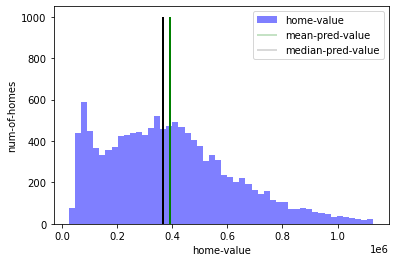

In [96]:
import matplotlib.ticker as plticker
# plot to visualize actual vs predicted. 
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="home-value", bins = 50)
plt.vlines(y_train.baseline_mean, 0, 1000, color='green', alpha=.3, label="mean-pred-value")
plt.vlines(y_train.baseline_med, 0, 1000, color='black', alpha=.2, label="median-pred-value")
plt.xlabel("home-value")
plt.ylabel("num-of-homes")
plt.legend()
plt.show()

# Modeling

In [97]:
y_train.head()

,taxvaluedollarcnt,baseline_mean,baseline_med
27625,701000.0,390945.136737,367028.0
20567,710675.0,390945.136737,367028.0
19775,124456.0,390945.136737,367028.0
5344,694978.0,390945.136737,367028.0
32713,78853.0,390945.136737,367028.0


### OLS Model

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [99]:
X_train = X_train.drop(columns=['taxvaluedollarcnt','baseline_residual', 'residual','yhat' ])

In [100]:
# create the model object (Best Model)
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(0.5)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(0.5)

print(f"""
        BASELINE:
              
        RMSE using Median
        Train/In-Sample: {round(rmse_train, 2)}
        Validate/Out-of-Sample: {round(rmse_validate, 2)}

        RMSE for OLS using LinearRegression
    
        Training/In-Sample: {round(rmse_train_lm, 2)}
        Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
        
        """)




        BASELINE:
              
        RMSE using Median
        Train/In-Sample: 230786.14
        Validate/Out-of-Sample: 231048.74

        RMSE for OLS using LinearRegression
    
        Training/In-Sample: 209345.76
        Validation/Out-of-Sample: 210152.55
        
        


### LassoLars Model

In [101]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(0.5)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(0.5)

print(f"""

        RMSE for LassoLars
    
        Training/In-Sample: {round(rmse_train_lars, 2)}
        Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
        
        """)



        RMSE for LassoLars
    
        Training/In-Sample: 209345.94
        Validation/Out-of-Sample: 210150.17
        
        


### TweedieRegressor (GLM)

In [102]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)




RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  211228.93991333802 
Validation/Out-of-Sample:  211228.93991333802


### Polynomial Regression

In [103]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [104]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  209345.76146799547 
Validation/Out-of-Sample:  210152.55010776487


# Evaluate Models w/Visual 

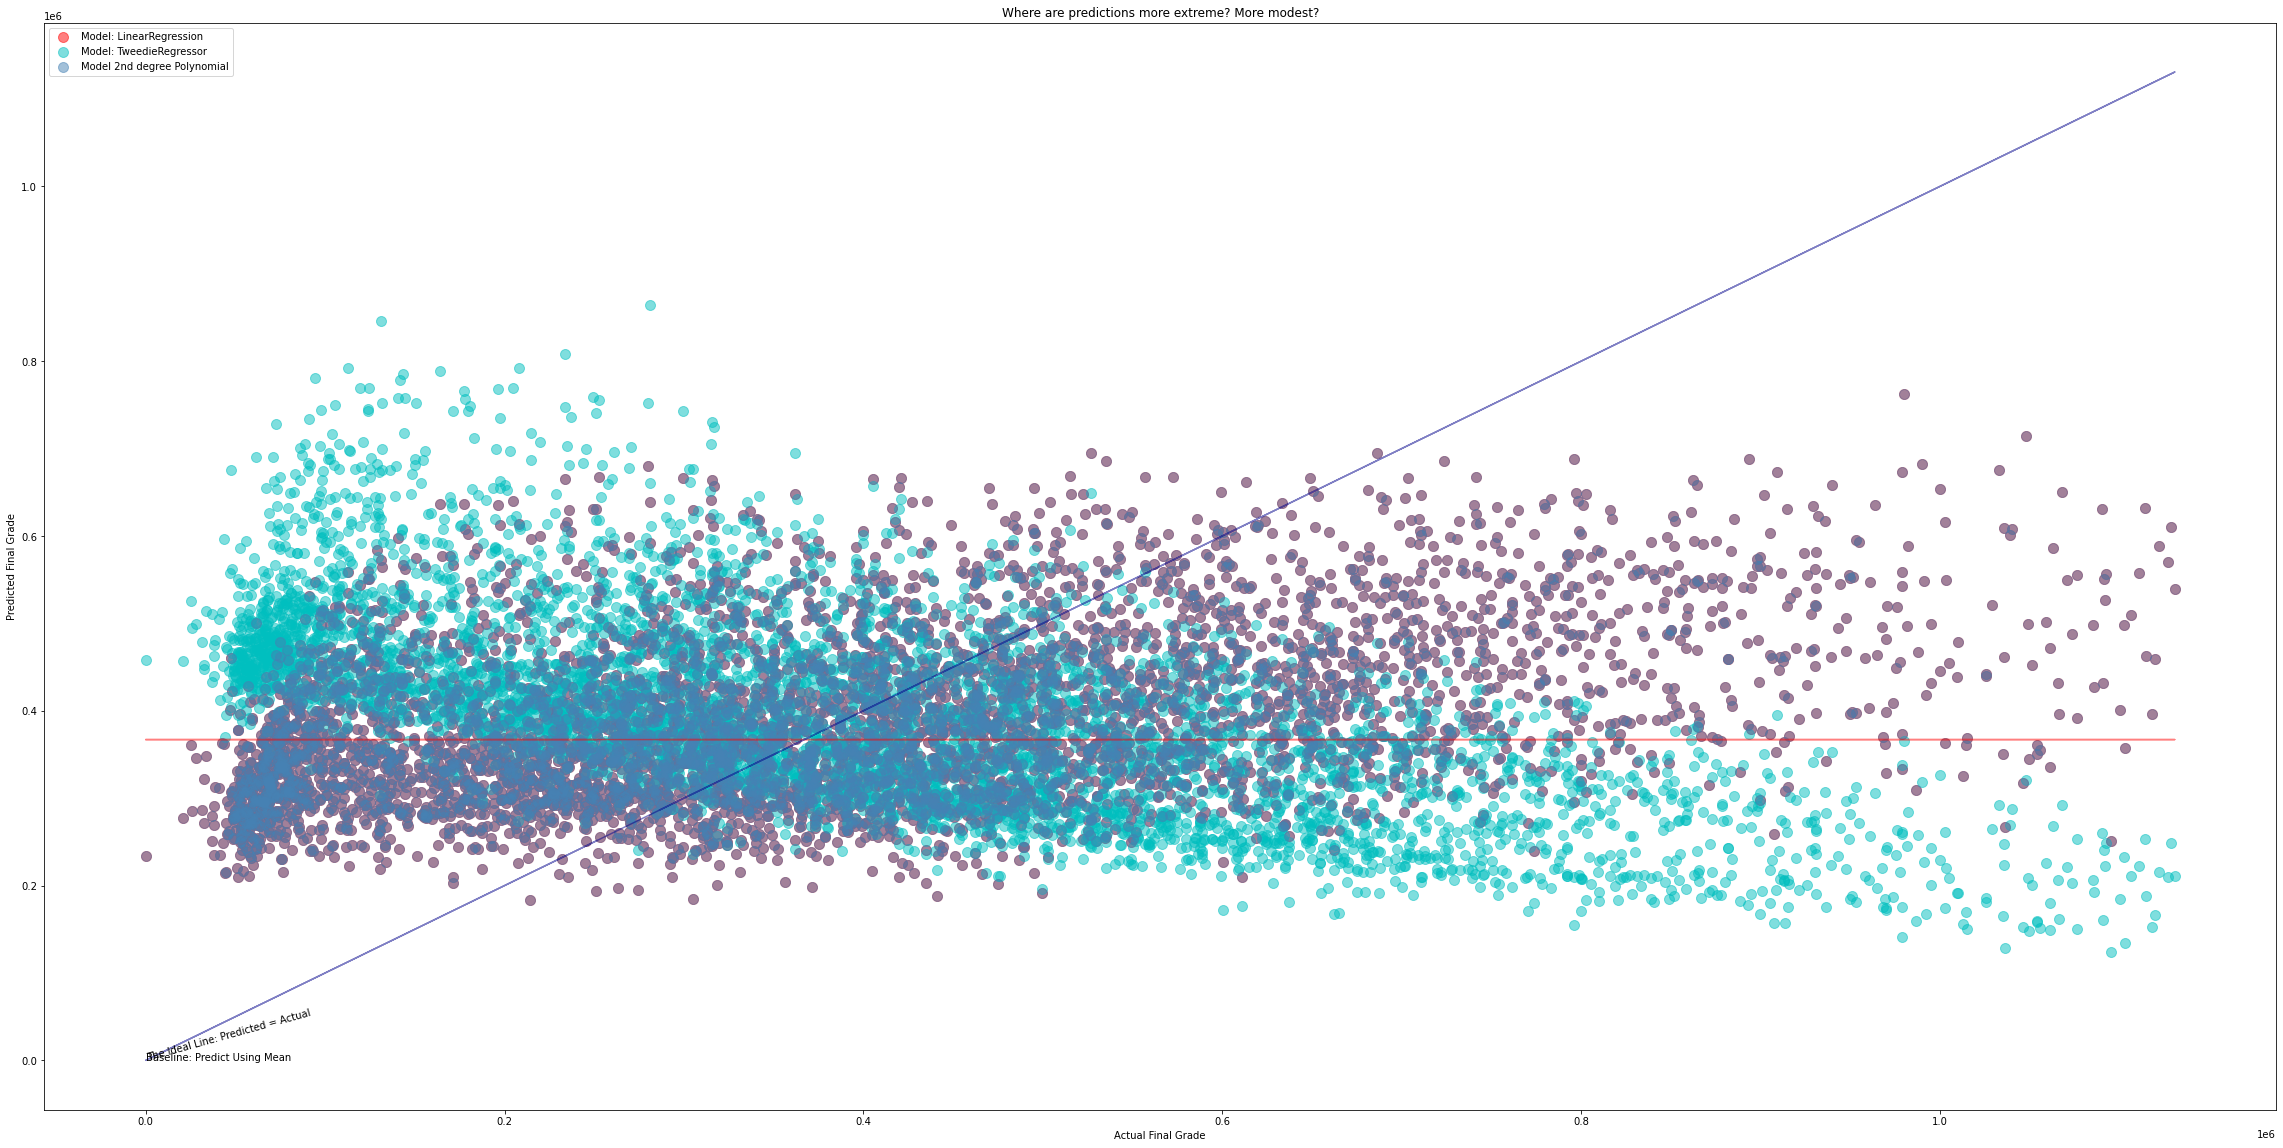

In [105]:
# y_validate.head()
plt.figure(figsize=(40,20))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.baseline_med, alpha=.5, color="Red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="Darkblue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="c", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2, 
            alpha=.5, color="steelblue", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


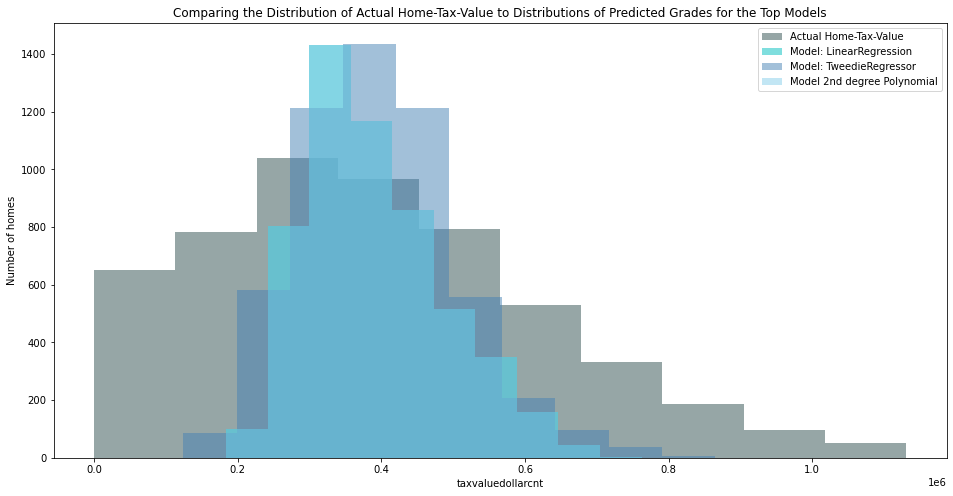

In [106]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='darkslategrey', alpha=.5, label="Actual Home-Tax-Value")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='c', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='steelblue', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='skyblue', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("taxvaluedollarcnt")
plt.ylabel("Number of homes")
plt.title("Comparing the Distribution of Actual Home-Tax-Value to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()



(array([ 652.,  784., 1038.,  968.,  794.,  530.,  332.,  187.,   98.,
          50.]),
 array([      0. ,  113076.6,  226153.2,  339229.8,  452306.4,  565383. ,
         678459.6,  791536.2,  904612.8, 1017689.4, 1130766. ]),
 <BarContainer object of 10 artists>)

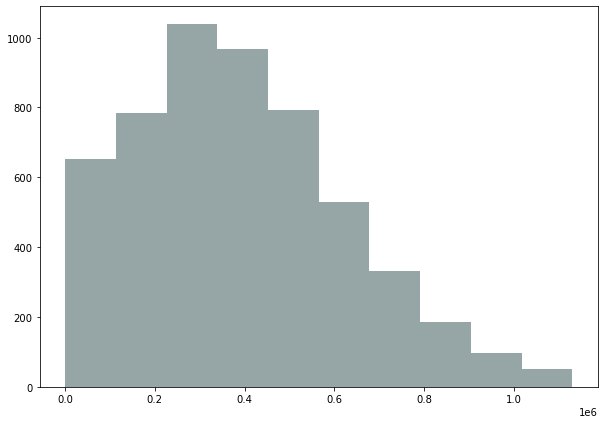

In [107]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt, color='darkslategrey', alpha=.5, label="Actual Home-Tax-Value")

(array([ 101.,  804., 1432., 1169.,  858.,  515.,  350.,  159.,   43.,
           2.]),
 array([183589.0572566 , 241478.59542231, 299368.13358802, 357257.67175373,
        415147.20991943, 473036.74808514, 530926.28625085, 588815.82441656,
        646705.36258227, 704594.90074798, 762484.43891369]),
 <BarContainer object of 10 artists>)

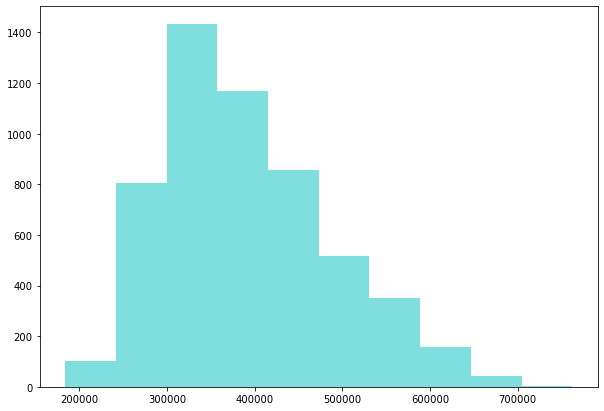

In [108]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='c', alpha=.5, label="Model: LinearRegression")

(array([  87.,  583., 1213., 1436., 1214.,  556.,  208.,   95.,   36.,
           5.]),
 array([124113.20929776, 198157.292754  , 272201.37621023, 346245.45966646,
        420289.5431227 , 494333.62657893, 568377.71003517, 642421.7934914 ,
        716465.87694763, 790509.96040387, 864554.0438601 ]),
 <BarContainer object of 10 artists>)

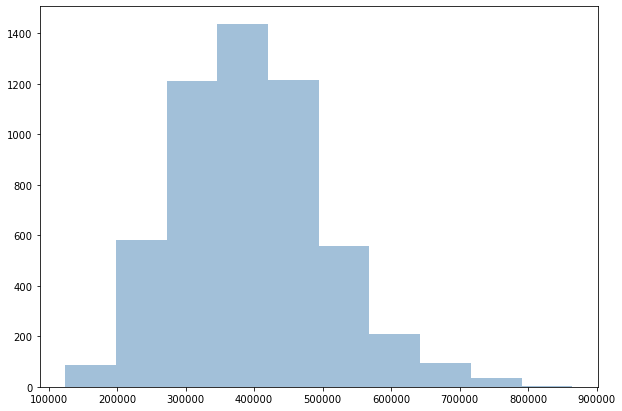

In [109]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='steelblue', alpha=.5, label="Model: TweedieRegressor")

(array([ 101.,  804., 1432., 1169.,  858.,  515.,  350.,  159.,   43.,
           2.]),
 array([183589.0572566 , 241478.59542231, 299368.13358802, 357257.67175373,
        415147.20991943, 473036.74808514, 530926.28625085, 588815.82441656,
        646705.36258227, 704594.90074798, 762484.43891369]),
 <BarContainer object of 10 artists>)

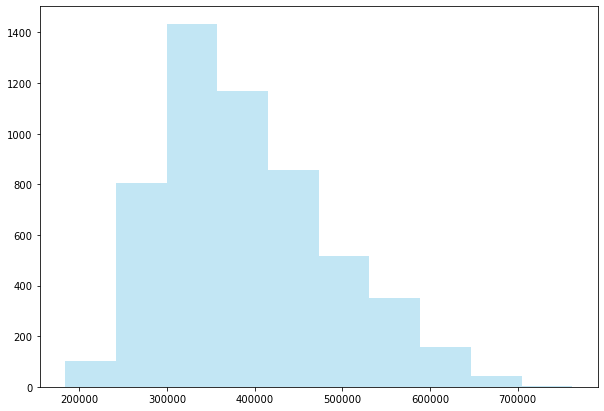

In [110]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='skyblue', alpha=.5, label="Model 2nd degree Polynomial")